# Spam Detection Project 2

In [476]:
#Import important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data acquisition

In [477]:
emails= pd.read_csv('messages.csv')
emails

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


# Data Preprocessing

In [478]:
print("Features/Columns : \n", emails.columns)

Features/Columns : 
 Index(['subject', 'message', 'label'], dtype='object')


In [479]:
print ('Shape =',emails.shape)

Shape = (2893, 3)


In [480]:
#checking datatype
print("Data Types :\n", emails.dtypes)

Data Types :
 subject    object
message    object
label       int64
dtype: object


In [481]:
#checking NAN value
print("Contains NaN/Empty cells : ", emails.isnull().values.any())

Contains NaN/Empty cells :  True


In [482]:
#checking null values in each column
print("Total empty cells by column :\n", emails.isnull().sum())

Total empty cells by column :
 subject    62
message     0
label       0
dtype: int64


In [483]:
emails.fillna(" ",inplace =True)

<AxesSubplot:>

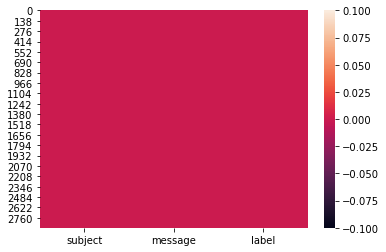

In [484]:
sns.heatmap(emails.isnull())

In [485]:
print ('Regular(0) and Spam(1) counts', '\n', emails.label.value_counts())

Regular(0) and Spam(1) counts 
 0    2412
1     481
Name: label, dtype: int64


In [486]:
#Ratio
print ('spam ratio = ', round(len(emails[emails['label']==1]) / len(emails.label),2)*100,'%')
print ('regular ratio  = ', round(len(emails[emails['label']==0]) / len(emails.label),2)*100,'%')

spam ratio =  17.0 %
regular ratio  =  83.0 %


Text(0.5, 6.79999999999999, '0 = regular , 1 = Spam')

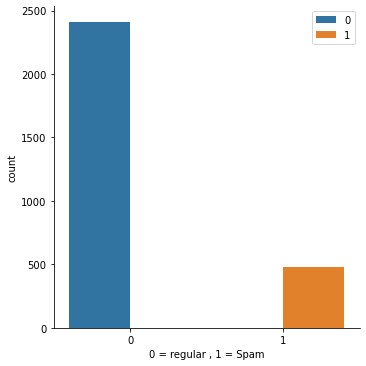

In [487]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='label',data=emails,kind='count',hue='label')
plt.legend()
plt.xlabel("0 = regular , 1 = Spam")

In [488]:
#New column for Length of message and subject
emails['length_message'] = emails.message.str.len()
emails['length_subject'] = emails.subject.str.len()
emails.head()

,subject,message,label,length_message,length_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39
1,,"lang classification grimes , joseph e . and ba...",0,1800,1
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50
3,risk,a colleague and i are researching the differin...,0,324,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,24


In [489]:
# Convert all messages to lower case
emails['subject'] = emails['subject'].str.lower()
emails['message'] = emails['message'].str.lower()

In [490]:
emails.head()

,subject,message,label,length_message,length_subject
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39
1,,"lang classification grimes , joseph e . and ba...",0,1800,1
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50
3,risk,a colleague and i are researching the differin...,0,324,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,24


In [491]:
cols=['message','subject']
for i in cols:
    # Replace email addresses with 'email'
    emails[i] = emails[i].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    emails[i] = emails[i].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    emails[i] = emails[i].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    emails[i] = emails[i].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    emails[i] = emails[i].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    emails[i] = emails[i].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    emails[i] = emails[i].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    emails[i] = emails[i].str.replace(r'^\s+|\s+?$', '')
    
    #REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
    emails[i]=emails[i].str.replace(r"[^a-zA-Z0-9]+", " ")
    
     #REPLACING one or 2  character length word   BY WHITE SPACE 
    emails[i]=emails[i].str.replace(r'\b[a-zA-Z]{1,2}\b', '')

In [492]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

emails['message'] = emails['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

emails['subject'] = emails['subject'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [493]:
# New column (clean_length) after puncuations,stopwords removal
emails['subject_clean_length'] = emails.subject.str.len()
emails['message_clean_length'] = emails.message.str.len()
emails.head()

,subject,message,label,length_message,length_subject,subject_clean_length,message_clean_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,2856,39,37,2019
1,,lang classification grimes joseph barbara grim...,0,1800,1,0,1417
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50,44,1055
3,risk,colleague researching differing degrees risk p...,0,324,4,4,208
4,request book information,earlier morning phone friend mine living south...,0,1046,24,24,599


In [494]:
# Total subject length removal
print ('Origian subject Length', emails.length_subject.sum())
print ('Clean subject Length', emails.subject_clean_length.sum())

Origian subject Length 91725
Clean subject Length 77452


In [495]:
# Total message length removal
print ('Origian message Length', emails.length_message.sum())
print ('Clean message Length', emails.message_clean_length.sum())

Origian message Length 9344743
Clean message Length 6498264


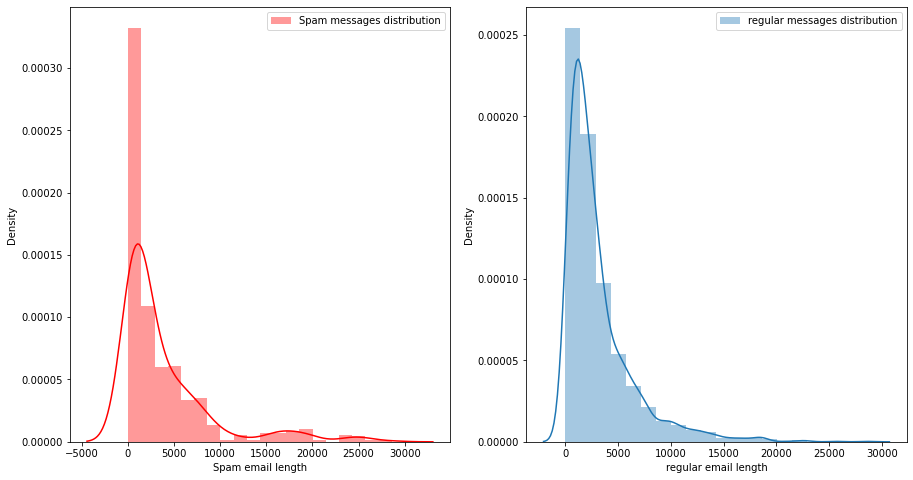

In [496]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(emails[emails['label']==1]['length_message'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(emails[emails['label']==0]['length_message'],bins=20,ax=ax[1],label='regular messages distribution')
ax[1].set_xlabel('regular email length')
ax[1].legend()

plt.show()


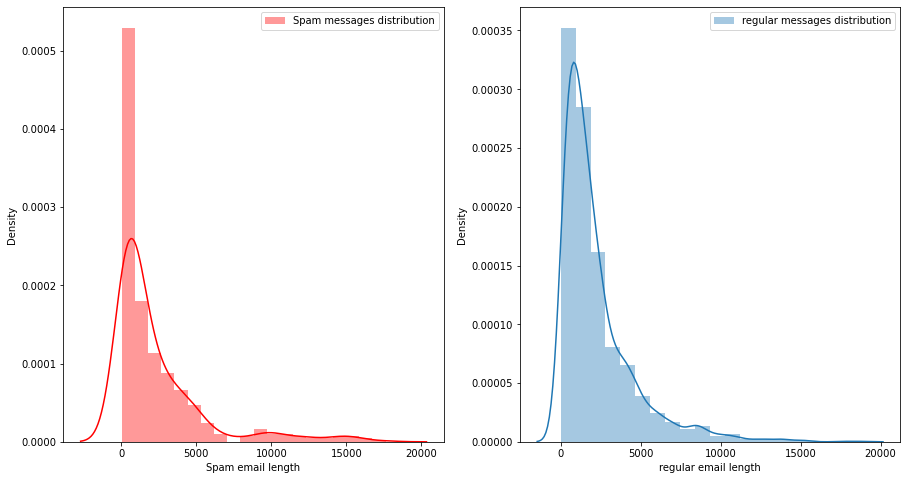

In [497]:
# Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(emails[emails['label']==1]['message_clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(emails[emails['label']==0]['message_clean_length'],bins=20,ax=ax[1],label='regular messages distribution')
ax[1].set_xlabel('regular email length')
ax[1].legend()

plt.show()


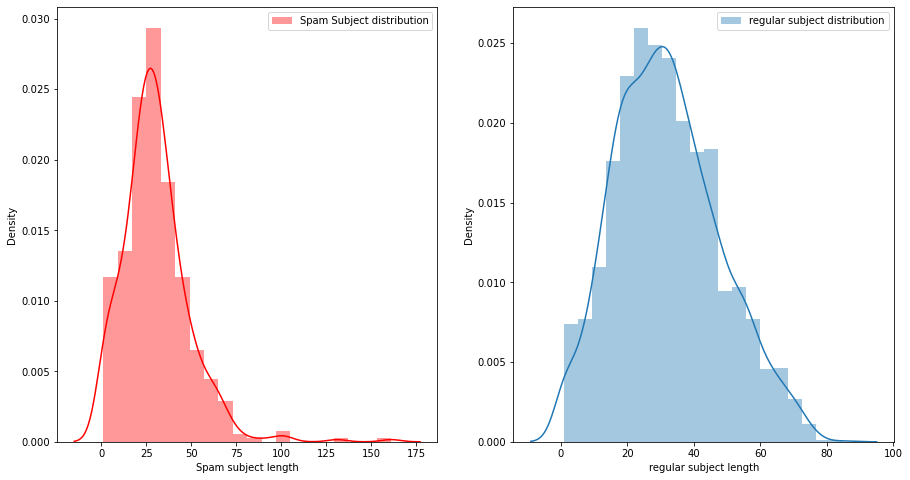

In [498]:
# Subject distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(emails[emails['label']==1]['length_subject'],bins=20,ax=ax[0],label='Spam Subject distribution',color='r')

ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(emails[emails['label']==0]['length_subject'],bins=20,ax=ax[1],label='regular subject distribution')
ax[1].set_xlabel('regular subject length')
ax[1].legend()

plt.show()

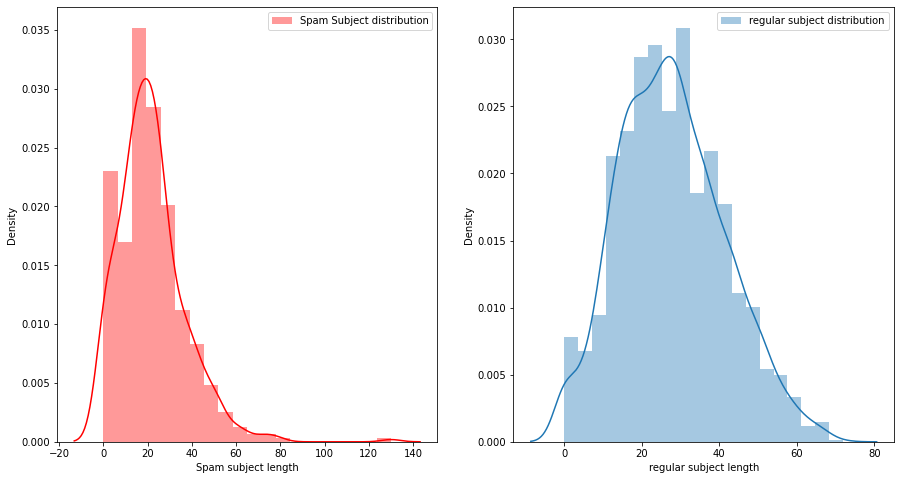

In [499]:
# Subject distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(emails[emails['label']==1]['subject_clean_length'],bins=20,ax=ax[0],label='Spam Subject distribution',color='r')

ax[0].set_xlabel('Spam subject length')
ax[0].legend()

sns.distplot(emails[emails['label']==0]['subject_clean_length'],bins=20,ax=ax[1],label='regular subject distribution')
ax[1].set_xlabel('regular subject length')
ax[1].legend()

plt.show()

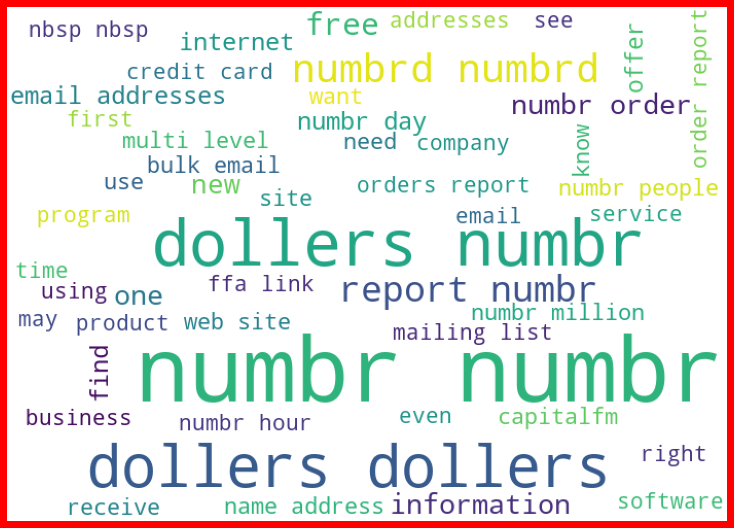

In [500]:
#Getting sense of loud words in spam messages
from wordcloud import WordCloud

spams = emails['message'][emails['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


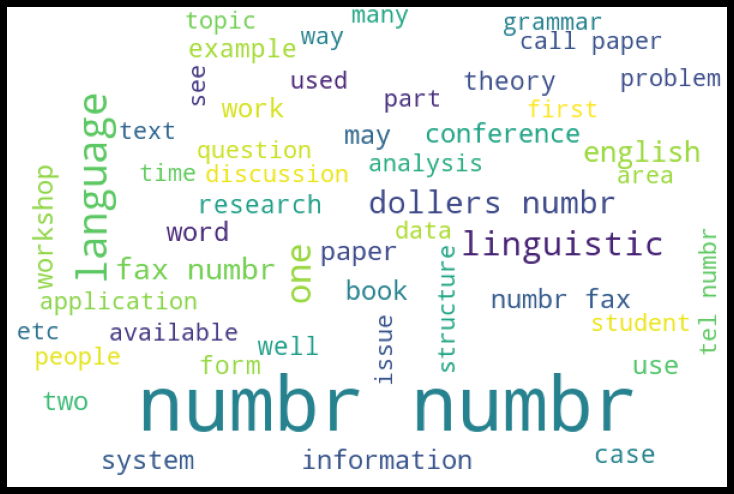

In [501]:
#Getting sense of loud words in regular message

hams = emails['message'][emails['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

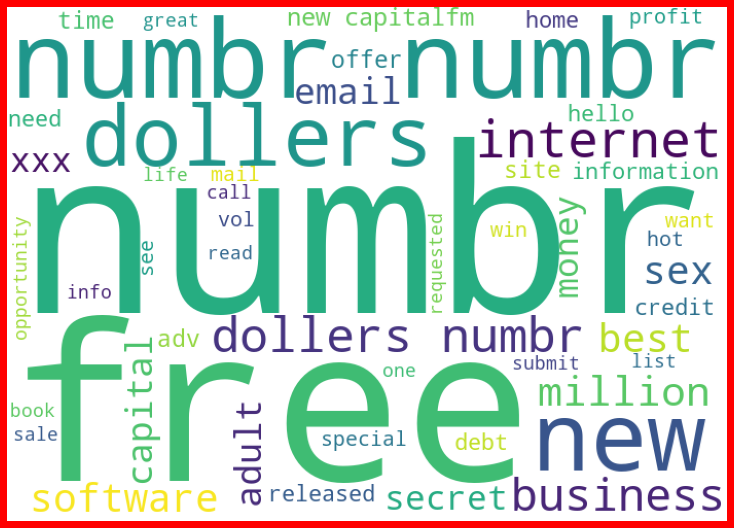

In [502]:
#Getting sense of loud words in spam emails subject

spams = emails['subject'][emails['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


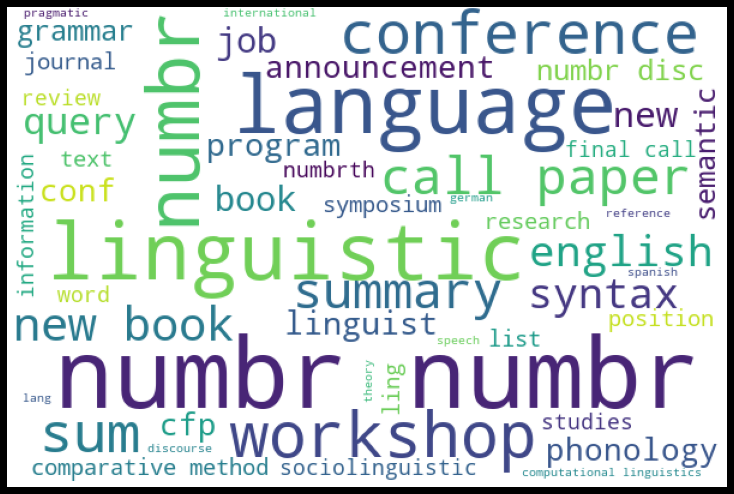

In [503]:
#Getting sense of loud words in regular email subject

hams = emails['subject'][emails['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [504]:
from collections import Counter
#lets count most frequent words in spam subject
count_spam = Counter(" ".join(emails[emails['label']==1]['subject']).split()).most_common(20)
df_count_spam = pd.DataFrame.from_dict(count_spam)
df_count_spam = df_count_spam.rename(columns={0: "words of spam", 1 : "count"})
df_count_spam

,words of spam,count
0,numbr,137
1,free,50
2,dollers,37
3,new,33
4,internet,17
5,business,16
6,email,15
7,software,12
8,best,12
9,sex,12


In [505]:
#lets count most frequent words in spam message
count_spam = Counter(" ".join(emails[emails['label']==1]['message']).split()).most_common(50)
df_count_spam = pd.DataFrame.from_dict(count_spam)
df_count_spam = df_count_spam.rename(columns={0: "words of spam", 1 : "count"})
df_count_spam

,words of spam,count
0,numbr,15210
1,dollers,4423
2,mail,1324
3,email,1062
4,report,1030
5,order,1004
6,free,925
7,money,916
8,get,835
9,program,826


In [506]:
#lets count most frequent words in regular email subject
count_spam = Counter(" ".join(emails[emails['label']==0]['subject']).split()).most_common(50)
df= pd.DataFrame.from_dict(count_spam)
df= df_count_spam.rename(columns={0: "words of normal mail", 1 : "count"})
df

,words of spam,count
0,numbr,15210
1,dollers,4423
2,mail,1324
3,email,1062
4,report,1030
5,order,1004
6,free,925
7,money,916
8,get,835
9,program,826


In [507]:
#lets count most frequent words in regular email message
count_spam = Counter(" ".join(emails[emails['label']==0]['message']).split()).most_common(50)
df_count = pd.DataFrame.from_dict(count_spam)
df_count = df_count_spam.rename(columns={0: "words of regular message", 1 : "count"})
df_count

,words of spam,count
0,numbr,15210
1,dollers,4423
2,mail,1324
3,email,1062
4,report,1030
5,order,1004
6,free,925
7,money,916
8,get,835
9,program,826


In [508]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()


features = tf_vec.fit_transform(emails['message']+emails['subject'])
x = features
y = emails['label']

In [509]:
# Train_train_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,stratify=y)

In [510]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [511]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [512]:
KNN=KNeighborsClassifier()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RF= RandomForestClassifier()
AD= AdaBoostClassifier()
MNB = MultinomialNB()

In [513]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier()



Accuracy score = 0.9599447513812155


cross validation score = 0.9602422145328721


roc_auc_score =  0.9459437086092716


classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       604
           1       0.85      0.93      0.88       120

    accuracy                           0.96       724
   macro avg       0.92      0.95      0.93       724
weighted avg       0.96      0.96      0.96       724



[[584  20]
 [  9 111]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression()



Accuracy score = 0.9530386740331491


cross validation score = 0.9519460684882471


roc_auc_score =  0.8583333333333334


classification_report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       604
     

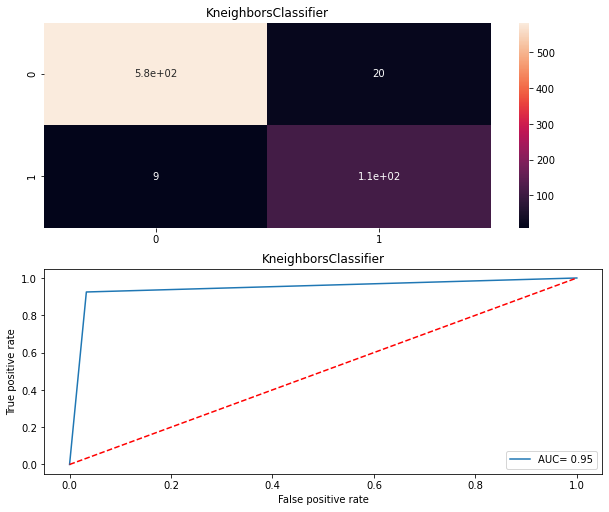

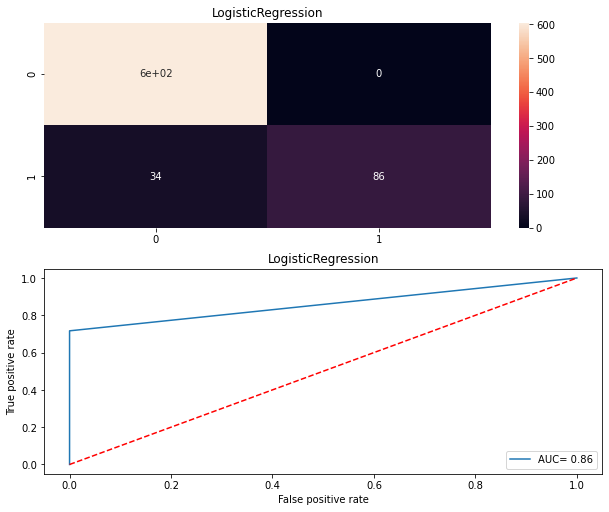

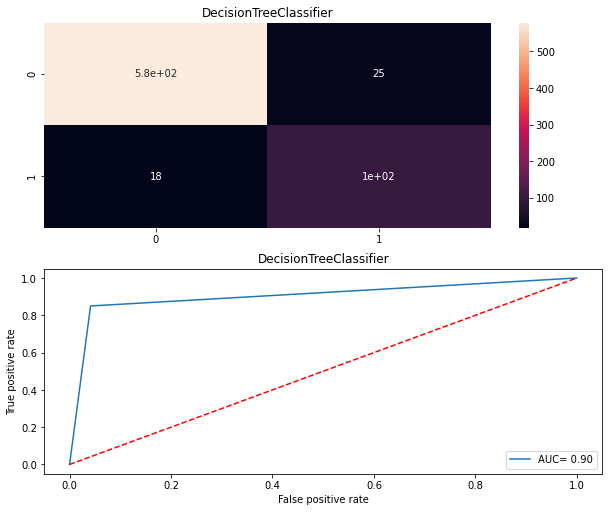

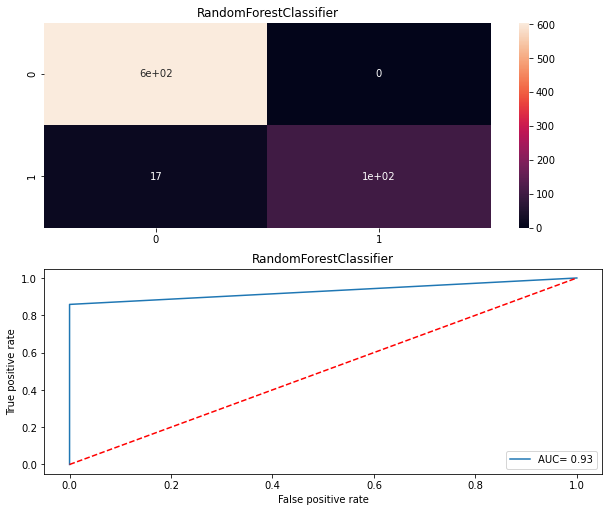

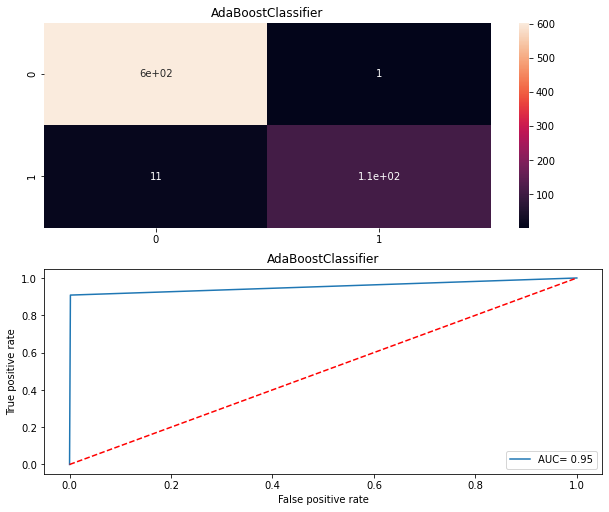

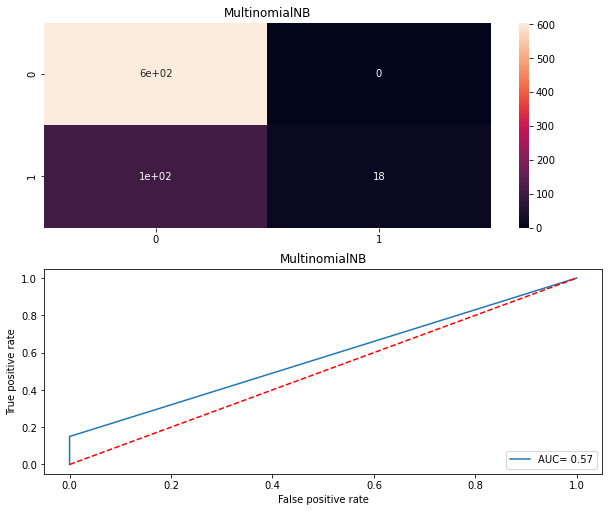

In [514]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [515]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,95.994475,96.024221,94.594371
1,LogisticRegression,95.303867,95.194607,85.833333
2,DecisionTreeClassifier,94.060773,94.573440,90.430464
3,RandomForestClassifier,97.651934,96.992722,92.916667
4,AdaBoostClassifier,98.342541,97.857416,95.333885
5,MultinomialNB,85.911602,86.035079,57.500000


###### I choose the AdaBoostClassifier because it has the highest scores. Besides the scores that are evident in the table above, it also classified the most of the entries in the table accurately.

In [516]:
#lets make our ADABOOST CLASSIFIER as final model

AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
ad_pred=AD.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9834254143646409
[[603   1]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       604
           1       0.99      0.91      0.95       120

    accuracy                           0.98       724
   macro avg       0.99      0.95      0.97       724
weighted avg       0.98      0.98      0.98       724



It only classified 12 out of 724 entries incorrectly.

In [517]:
#save model as a pickle file
import joblib
joblib.dump(AD,'Spam.pkl')

['Spam.pkl']